# Numerical Methods Comparison for ODE: dy/dt = -2ty

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define the ODE and exact solution

In [2]:
def f(t, y):
    return -2 * t * y

def dfdt(t, y):
    return -2 * y

def dfdy(t, y):
    return -2 * t

def df(t, y):
    return dfdt(t, y) + dfdy(t, y) * f(t, y)

def exact_solution(t):
    return np.exp(-(t**2))

## Numerical methods (non-vectorized)

In [3]:
def eulers_method(t_0, y_0, h, t_target):
    t = t_0
    y = y_0
    result = [(t, y)]
    while t < t_target:
        y = y + h * f(t, y)
        t = t + h
        result.append((t, y))
    return result

def heuns_method(t_0, y_0, h, t_target):
    t = t_0
    y = y_0
    result = [(t, y)]
    while t < t_target:
        k1 = f(t, y)
        k2 = f(t + h, y + h * k1)
        y = y + h / 2 * (k1 + k2)
        t = t + h
        result.append((t, y))
    return result

def taylor_2_method(t_0, y_0, h, t_target):
    t = t_0
    y = y_0
    result = [(t, y)]
    while t < t_target:
        y = y + h * f(t, y) + (h**2 / 2) * df(t, y)
        t = t + h
        result.append((t, y))
    return result

## Vectorized methods

In [4]:
def eulers_method_vectorized(t_array, y_0):
    y = np.zeros(len(t_array))
    y[0] = y_0
    for i in range(len(t_array) - 1):
        h = t_array[i + 1] - t_array[i]
        y[i + 1] = y[i] + h * f(t_array[i], y[i])
    return y

def heuns_method_vectorized(t_array, y_0):
    y = np.zeros(len(t_array))
    y[0] = y_0
    for i in range(len(t_array) - 1):
        h = t_array[i + 1] - t_array[i]
        k1 = f(t_array[i], y[i])
        k2 = f(t_array[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + h / 2 * (k1 + k2)
    return y

def taylor_2_method_vectorized(t_array, y_0):
    y = np.zeros(len(t_array))
    y[0] = y_0
    for i in range(len(t_array) - 1):
        h = t_array[i + 1] - t_array[i]
        y[i + 1] = y[i] + h * f(t_array[i], y[i]) + (h**2 / 2) * df(t_array[i], y[i])
    return y

## Plot comparison functions

In [5]:
def compare_solutions(t_0, y_0, h, t_target, *functions):
    plt.figure(figsize=(12, 8))
    colors = ["blue", "green", "orange", "purple", "brown"]
    markers = ["o", "s", "^", "D", "v"]
    for i, function in enumerate(functions):
        result = function(t_0, y_0, h, t_target)
        t = [point[0] for point in result]
        y = [point[1] for point in result]
        plt.plot(t, y, color=colors[i % len(colors)], marker=markers[i % len(markers)],
                 linestyle="-", label=f"{function.__name__} (h={h})", markersize=4, linewidth=1.5, zorder=2 + i)
    t_exact = np.linspace(t_0, t_target, 1000)
    plt.plot(t_exact, exact_solution(t_exact), "r-", label="Exact Solution", linewidth=4, zorder=1)
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.title("Comparison: Numerical Methods vs Exact Solution")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def compare_solutions_vectorized(t_array, y_0, *functions):
    plt.figure(figsize=(12, 8))
    colors = ["blue", "green", "orange", "purple", "brown"]
    markers = ["o", "s", "^", "D", "v"]
    for i, function in enumerate(functions):
        y = function(t_array, y_0)
        plt.plot(t_array, y, color=colors[i % len(colors)], marker=markers[i % len(markers)],
                 linestyle="-", label=f"{function.__name__}", markersize=4, linewidth=1.5, zorder=2 + i)
    t_exact = np.linspace(t_array[0], t_array[-1], 1000)
    plt.plot(t_exact, exact_solution(t_exact), "r-", label="Exact Solution", linewidth=4, zorder=1)
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.title("Comparison: Vectorized Numerical Methods vs Exact Solution")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## Convergence analysis

In [6]:
def approximate_convergence_order(h_1=1e-2, h_2=1e-3, y_0=1.0):
    t_1 = np.arange(0, 2, h_1)
    t_2 = np.arange(0, 2, h_2)
    error_1 = np.max(np.abs(eulers_method_vectorized(t_1, y_0) - exact_solution(t_1)))
    error_2 = np.max(np.abs(eulers_method_vectorized(t_2, y_0) - exact_solution(t_2)))
    p = np.log(error_1 / error_2) / np.log(h_1 / h_2)
    print(f"p for Euler's method: {p}")

    error_1 = np.max(np.abs(heuns_method_vectorized(t_1, y_0) - exact_solution(t_1)))
    error_2 = np.max(np.abs(heuns_method_vectorized(t_2, y_0) - exact_solution(t_2)))
    p = np.log(error_1 / error_2) / np.log(h_1 / h_2)
    print(f"p for Heun's method: {p}")

    error_1 = np.max(np.abs(taylor_2_method_vectorized(t_1, y_0) - exact_solution(t_1)))
    error_2 = np.max(np.abs(taylor_2_method_vectorized(t_2, y_0) - exact_solution(t_2)))
    p = np.log(error_1 / error_2) / np.log(h_1 / h_2)
    print(f"p for Taylor's 2nd order method: {p}")

## Error vs step size (log-log plot)

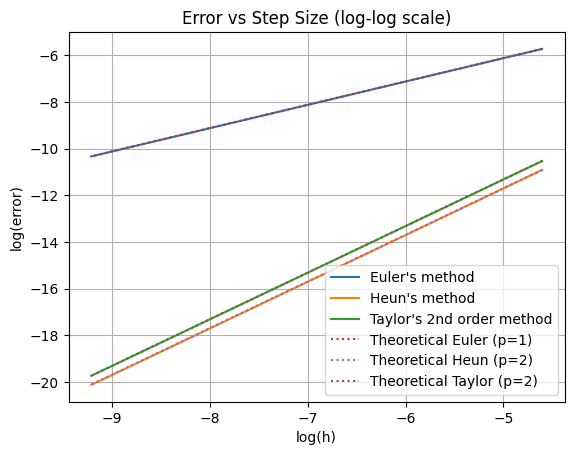

In [7]:
h_1, h_2, h_3 = 1e-2, 1e-3, 1e-4
y_0 = 1.0
t_1 = np.arange(0, 2, h_1)
t_2 = np.arange(0, 2, h_2)
t_3 = np.arange(0, 2, h_3)

euler_error_1 = np.max(np.abs(eulers_method_vectorized(t_1, y_0) - exact_solution(t_1)))
euler_error_2 = np.max(np.abs(eulers_method_vectorized(t_2, y_0) - exact_solution(t_2)))
euler_error_3 = np.max(np.abs(eulers_method_vectorized(t_3, y_0) - exact_solution(t_3)))

heun_error_1 = np.max(np.abs(heuns_method_vectorized(t_1, y_0) - exact_solution(t_1)))
heun_error_2 = np.max(np.abs(heuns_method_vectorized(t_2, y_0) - exact_solution(t_2)))
heun_error_3 = np.max(np.abs(heuns_method_vectorized(t_3, y_0) - exact_solution(t_3)))

taylor_error_1 = np.max(np.abs(taylor_2_method_vectorized(t_1, y_0) - exact_solution(t_1)))
taylor_error_2 = np.max(np.abs(taylor_2_method_vectorized(t_2, y_0) - exact_solution(t_2)))
taylor_error_3 = np.max(np.abs(taylor_2_method_vectorized(t_3, y_0) - exact_solution(t_3)))

h = np.log(np.array([h_1, h_2, h_3]))
euler_error = np.log(np.array([euler_error_1, euler_error_2, euler_error_3]))
heun_error = np.log(np.array([heun_error_1, heun_error_2, heun_error_3]))
taylor_error = np.log(np.array([taylor_error_1, taylor_error_2, taylor_error_3]))

plt.plot(h, euler_error, label="Euler's method")
plt.plot(h, heun_error, label="Heun's method")
plt.plot(h, taylor_error, label="Taylor's 2nd order method")

plt.plot(h, euler_error[0] + (h - h[0]) * 1, linestyle=":", label="Theoretical Euler (p=1)")
plt.plot(h, heun_error[0] + (h - h[0]) * 2, linestyle=":", label="Theoretical Heun (p=2)")
plt.plot(h, taylor_error[0] + (h - h[0]) * 2, linestyle=":", label="Theoretical Taylor (p=2)")

plt.xlabel("log(h)")
plt.ylabel("log(error)")
plt.title("Error vs Step Size (log-log scale)")
plt.legend()
plt.grid(True)
plt.show()